In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) #tensorflow의 version을 확인합니다

2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape


(10000, 28, 28)

In [8]:
len(test_labels)


10000

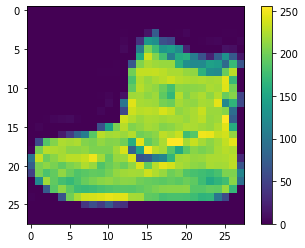

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

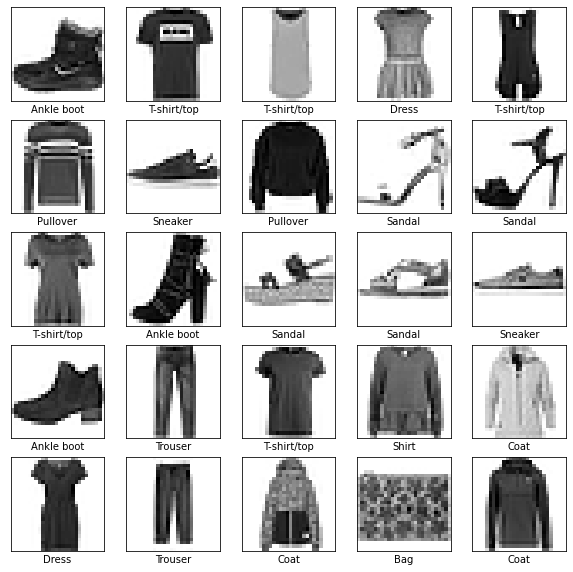

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 이미지를 1차원으로 펴주기
    keras.layers.Dense(128, activation='relu'), # relu: 0보다 크면 그대로 반환, 0보다 작은 음수면 0을 반환. 즉 음수는 없다
    keras.layers.Dense(10, activation='softmax') # 한세트에서 가장 큰 숫자를 골라서 1로 만들고 나머지는 0으로 만든다
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 결과가 좋은지 나쁜지 판단하는 기준. loss가 떨어져야 한다. error 값.
              metrics=['accuracy']) # 정확도. 큰것이 더 좋은것이다.

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6367 - accuracy: 0.7812
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3837 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3394 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8893


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3464 - accuracy: 0.8748

테스트 정확도: 0.8748000264167786


In [16]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([2.3254536e-06, 2.1561668e-07, 8.6595713e-07, 1.8021824e-07,
       9.7780628e-07, 6.5624001e-03, 1.1320258e-05, 3.6649019e-02,
       1.9971326e-04, 9.5657307e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

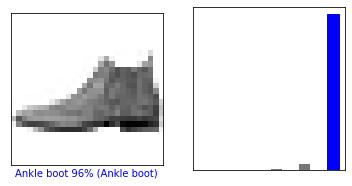

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

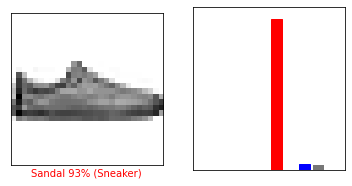

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

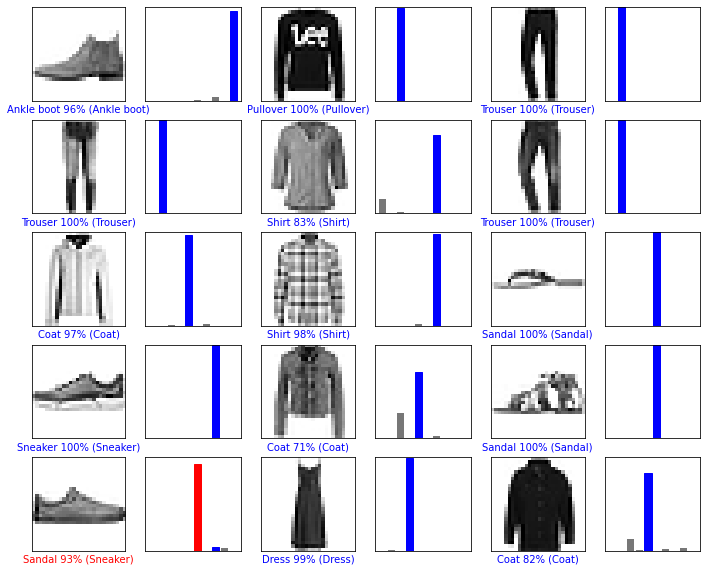

In [23]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.3254554e-06 2.1561665e-07 8.6595782e-07 1.8021804e-07 9.7780617e-07
  6.5624085e-03 1.1320267e-05 3.6649067e-02 1.9971342e-04 9.5657295e-01]]


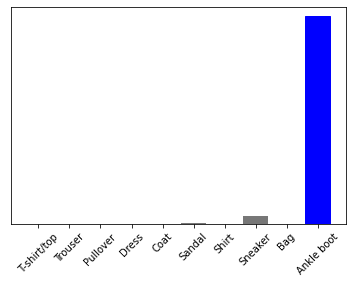

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9